In [26]:
#all import statements
import os
import pandas as pd
import torch 
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


In [27]:
#function to train the model
def modeltrain(X_train, y_train,l2_lambda=0.01,verbose=True):  # Specify the regularization strength (lambda)
    # global model
    input_size = X_train.shape[1]
    model = nn.Linear(input_size, 1).double()  # Double data type for weight tensor

    # Define loss function and optimizer with L2 regularization
    criterion = nn.MSELoss()
    optimizer = optim.SGD(model.parameters(), lr=0.01, weight_decay=l2_lambda)  # Adding weight decay for L2 regularization

    # Train the model (rest of the code remains the same)
    num_epochs = 1000

    if verbose==True:
        for epoch in range(num_epochs):
            # Forward pass
            outputs = model(X_train.double())  # Ensure input data type matches model's weight data type
            loss = criterion(outputs, y_train.view(-1, 1))

            # Backward pass and optimization
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

            if (epoch + 1) % 100 == 0:
                print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item()}')

    print('Training Done')
    return model


In [28]:
#function to test the model

def modeltest(X_test,y_test,model,verbose=True):
    if verbose:
        print("Testing starting")
    
    # Assuming 'model' is your trained linear regression model
 
    with torch.no_grad():
        predictions = model(X_test)



    if verbose:
        print('testing over now accuracy analysis')

    correct_pred=0
    for i in range(len(predictions)):
       
        if(abs(predictions[i]-y_test[i])<0.5):
            
            correct_pred+=1
    mean_accuracy=(correct_pred/len(predictions))*100
    

    
    

    #Calculation of mae,mse and r2 squared 
    mae = (mean_absolute_error(y_test, predictions))
    mse = mean_squared_error(y_test, predictions)
    r2 = r2_score(y_test, predictions.numpy())
    
    if verbose:        
        print(f'Percentage Accuracy: {mean_accuracy:.2f}%')
        print(f'Mean Absolute Error: {mae}')
        print(f'Mean Squared Error: {mse}')
        print(f'R-squared: {r2}')

    # Printing  the model parameters (coefficients)
    for name, param in model.named_parameters():
        if param.requires_grad:
            print(f'{name}: {param.data.numpy()}')

    return predictions

    

In [29]:
#Function to  create a scatter plot for target and in the same plot  line plot for model predictions
def create_plot(X,y,z):
   
    feature_to_plot=[]
    list2=[]
    for i in range(len(X)):
        feature_to_plot.append(i+1)
        
  
    for i in range(len(y)):
     
         list2.append([z[i].item(),y[i].item()])
    # print(list2)
    list2.sort()
    y=[]
    z=[]
    for i in range(len(list2)):
        y.append(list2[i][1])
        z.append(list2[i][0])


    # Create a scatter plotc.ear
   
    plt.scatter(feature_to_plot,y,label='label(y)',alpha=0.5,color='red')

    # # plt.scatter(feature_to_plot3, y, alpha=0.5)  #line plot
    #Creating plot with label and axis name
    plt.plot(feature_to_plot,z,label='prediction(z)',alpha=0.5)
   
    plt.legend()
    plt.xlabel('Data Point')  # Replace with the appropriate feature name
    plt.ylabel('prediction(z),label(y)')
    plt.title('Prediction(z),label(y) vs. Data Point')
    plt.show()

In [30]:
model=None
X_train=None
y_train=None
X_test=None
y_test=None
def tester(testing_row=None):
   
    if testing_row is None:
        print("input size is ",X_test.shape," and output size is ",(y_test.shape))
        # pred=0
        pred=modeltest(X_test,y_test,model)
        
    else:
        
        # print(X_test[testing_row].shape)
        # print(y_test[testing_row].shape)
        x1=X_test[testing_row].view(1,-1)
        y1=y_test[testing_row].view(1)
        print("input size is ",x1.shape," and output size is ",(y1.shape))
        
        pred=0
        pred=modeltest(x1,y1,model,verbose=False)
        pred1=pred.item()
        # print("---------------------------------------------------------")
        print("input features are : ",(x1).tolist())
        print("prediction is ",round(pred1,2))
        y1=y1.item()
        print("actual value is ",round(y1,2))
        print("relative error is ",round((abs(y1-pred1))*100/y1,2),"%")
        print("---------------------------------------------------------")
        print()

    return pred
        


Epoch [100/1000], Loss: 4.408363736597461
Epoch [200/1000], Loss: 4.127253703969457
Epoch [300/1000], Loss: 4.014552284055971
Epoch [400/1000], Loss: 3.9632599771305217
Epoch [500/1000], Loss: 3.9364707549320386
Epoch [600/1000], Loss: 3.9207156082133903
Epoch [700/1000], Loss: 3.9106487519701205
Epoch [800/1000], Loss: 3.9038829720223456
Epoch [900/1000], Loss: 3.8992003507183353
Epoch [1000/1000], Loss: 3.895901626859371
Training Done
input size is  torch.Size([90, 3])  and output size is  torch.Size([90])
Testing starting
testing over now accuracy analysis
Percentage Accuracy: 22.22%
Mean Absolute Error: 1.5038058944035302
Mean Squared Error: 3.620336825390649
R-squared: 0.9604243466796191
weight: [[3.033197   2.0320254  0.06133184]]
bias: [-0.25454174]


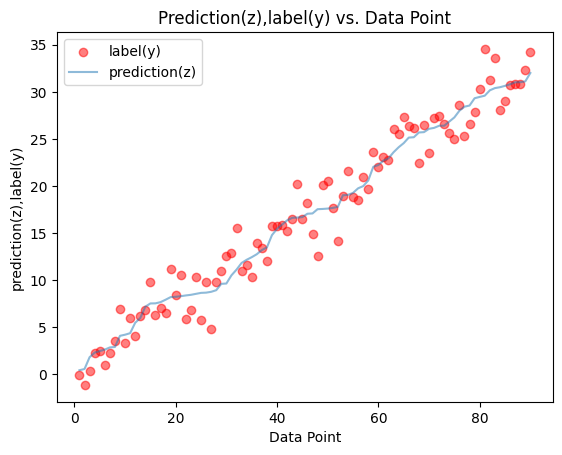

Linear(in_features=3, out_features=1, bias=True)
------------------------------------------------


In [31]:


'''Function to train the model with selected feature drop feature corresponds to list of feature to drop and testing=True by default means MSE,MAE,
R-squared will be computed else will only train the model and send it for testing without computing MSE,MAE,R-squared'''
def train_with_selected_features(drop_features=[],testing=True):
    if type(drop_features)==type("string"):
        drop_features=[drop_features]
    global model
    global X_test
    global y_test
    global X_train
    global y_train
    
    #Data  proccessing and normalisation 

    df = pd.read_csv('Q3_complex_linear_regression_dataset.csv')




    # Define a mapping from categories to numerical values
    if 'X3' not in drop_features:
    
        category_mapping = {'A': 1.0, 'B': 2.0, 'C': 3.0}
        df['X3'] = df['X3'].map(category_mapping)

    # Separate the target variable 'y' from the input features.Also features not required are dropped

    drop_features.append('y')
    X = df.drop(columns=drop_features)
 
    y = df['y']

    for column in X.columns:
        try:
            X[column] = X[column].astype(float)
        except ValueError:
            print(f"Column '{column}' cannot be converted to float.")



    # Convert the DataFrame to a PyTorch tensor.
    X = torch.tensor(X.values, dtype=torch.float64)
    # Convert the target variable to a PyTorch tensor.
    y = torch.tensor(y.values, dtype=torch.float64)
    X1=X


    size=len(X)
    train_ratio=0.7
    train_size=int(size*train_ratio)
    # test_size=size-train_size


    #Splitting the data in training and testing data 


    #Training data
    X_train=X[:train_size]
    y_train=y[:train_size]

    #Testing data
    
    X_test=X[train_size:]
    y_test=y[train_size:]

  
    
    model=modeltrain(X_train, y_train,l2_lambda=0.01,verbose=testing)  # You can adjust the regularization st

    # pred=modeltest(X_test,y_test,model)
    
    if testing==True:
        pred=tester()
       
        # print(type(y_test))
        # print(type(pred))
        # for i in [X_test,y_test,pred]:
     
        #     print(i.shape)
        create_plot(X_test,y_test,pred)
        
        print(model)
    print("------------------------------------------------")
    
    # return X_test

train_with_selected_features()

In [32]:
#Relation of input variables with each other (EDA)
input1=[]
input2=[]
input3=[]
output=[]
for i in range(len(X_train)):
    c=X_train[i][0]

    input1.append(c.item())
    c=X_train[i][1]

    input2.append(c.item())
    c=X_train[i][2]
    input3.append(c.item())
    c=y_train[i]
    output.append(c.item())


covariance_matrix = np.cov(input1, input2)

'''Extract the covariance between the two variables from the covariance matrix.Numpy arrays are 
 used here and its built in functions utilised to compute covariance'''


covariance_matrix1 = np.cov(input1, input3)
covariance_matrix2 = np.cov(input3, input2)
covariance_matrix3=np.cov(input1, output)
covariance_matrix4=np.cov(input2, output)
covariance_matrix5=np.cov(input3, output)
covariance = covariance_matrix[0, 1]
covariance1 = covariance_matrix1[0, 1]
covariance2 = covariance_matrix2[0, 1]
covariance3 = covariance_matrix3[0, 1]
covariance4 = covariance_matrix4[0, 1]
covariance5 = covariance_matrix5[0, 1]

#Extracting correlation factor between target and each input
correlation_coefficient1 = np.corrcoef(input1, y_train)[0, 1]
correlation_coefficient2 = np.corrcoef(input2, y_train)[0, 1]
correlation_coefficient3 = np.corrcoef(input3, y_train)[0, 1]



print("Covariance between X1 and X2:", covariance)
print("Covariance between X2 and X3:", covariance1)
print("Covariance between X3 and X1:", covariance2)
print("Covariance between X1 and y:", covariance3)
print("Covariance between X2 and y:", covariance4)
print("Covariance between X3 and y:", covariance5)

print("---------------------------------------------------")

print(f"Correlation Coefficient between X1 and y: {correlation_coefficient1:.2f}")
print(f"Correlation Coefficient between X2 and y: {correlation_coefficient2:.2f}")
print(f"Correlation Coefficient between X3 and y: {correlation_coefficient3:.2f}")





Covariance between X1 and X2: 0.12740488844015435
Covariance between X2 and X3: 0.015396627005088991
Covariance between X3 and X1: -0.014171793119161571
Covariance between X1 and y: 24.942920604841778
Covariance between X2 and y: 0.9254363356859601
Covariance between X3 and y: 0.11293652151999131
---------------------------------------------------
Correlation Coefficient between X1 and y: 0.97
Correlation Coefficient between X2 and y: 0.20
Correlation Coefficient between X3 and y: 0.01


In [33]:
#




In [34]:
#Function  to remove any two features and train the model


Linear(in_features=3, out_features=1, bias=True)
Epoch [100/1000], Loss: 4.22577021996228
Epoch [200/1000], Loss: 4.065099256941144
Epoch [300/1000], Loss: 3.9932278798653145
Epoch [400/1000], Loss: 3.9557197238992874
Epoch [500/1000], Loss: 3.9336781130251195
Epoch [600/1000], Loss: 3.919611880889493
Epoch [700/1000], Loss: 3.910175786236802
Epoch [800/1000], Loss: 3.9036618274556307
Epoch [900/1000], Loss: 3.8990882045028505
Epoch [1000/1000], Loss: 3.8958408289132227
Training Done
input size is  torch.Size([90, 3])  and output size is  torch.Size([90])
Testing starting
testing over now accuracy analysis
Percentage Accuracy: 22.22%
Mean Absolute Error: 1.5039121262764639
Mean Squared Error: 3.6204752346362405
R-squared: 0.9604228336611945
weight: [[3.03309648 2.03431224 0.06093084]]
bias: [-0.25431005]


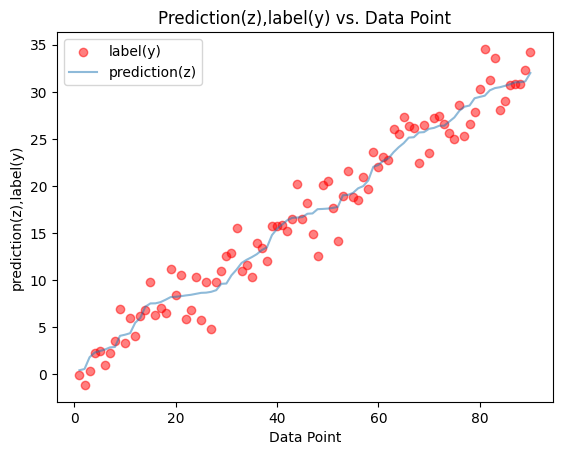

Linear(in_features=3, out_features=1, bias=True)
------------------------------------------------
Epoch [100/1000], Loss: 90.26489466047494
Epoch [200/1000], Loss: 84.46844539870864
Epoch [300/1000], Loss: 81.8270164923681
Epoch [400/1000], Loss: 80.4426247983326
Epoch [500/1000], Loss: 79.63725943983053
Epoch [600/1000], Loss: 79.13713898270083
Epoch [700/1000], Loss: 78.81457640383974
Epoch [800/1000], Loss: 78.60174329659894
Epoch [900/1000], Loss: 78.45910806857889
Epoch [1000/1000], Loss: 78.3623029032849
Training Done
input size is  torch.Size([90, 2])  and output size is  torch.Size([90])
Testing starting
testing over now accuracy analysis
Percentage Accuracy: 4.44%
Mean Absolute Error: 8.401678128158212
Mean Squared Error: 92.6312302088358
R-squared: -0.012596791457300416
weight: [[4.13199625 0.75947639]]
bias: [12.19176488]


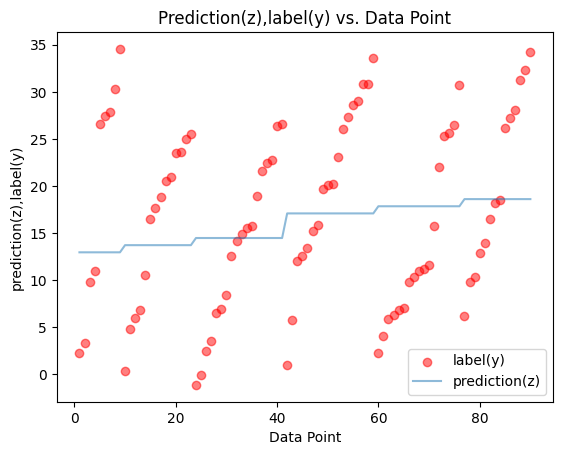

Linear(in_features=2, out_features=1, bias=True)
------------------------------------------------
Epoch [100/1000], Loss: 5.041465874064328
Epoch [200/1000], Loss: 5.036303976610383
Epoch [300/1000], Loss: 5.034401878198209
Epoch [400/1000], Loss: 5.033707353145029
Epoch [500/1000], Loss: 5.0334577076531675
Epoch [600/1000], Loss: 5.03337044370458
Epoch [700/1000], Loss: 5.0333415098561245
Epoch [800/1000], Loss: 5.033332941504014
Epoch [900/1000], Loss: 5.033331110082896
Epoch [1000/1000], Loss: 5.033331262968776
Training Done
input size is  torch.Size([90, 1])  and output size is  torch.Size([90])
Testing starting
testing over now accuracy analysis
Percentage Accuracy: 18.89%
Mean Absolute Error: 1.7371457233961065
Mean Squared Error: 4.6488522931981455
R-squared: 0.9491811465157209
weight: [[3.08124178]]
bias: [0.62710432]


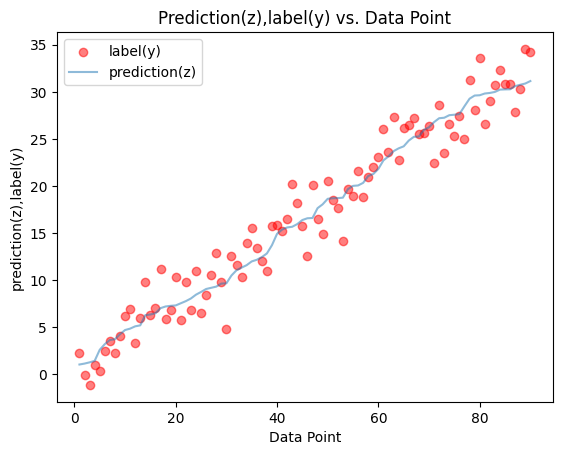

Linear(in_features=1, out_features=1, bias=True)
------------------------------------------------


In [35]:
### You can uncomment these two to run the code for model predictions by removing one and two features respectively.


print(model)
train_with_selected_features()

# Function  to remove any one features and train the model
train_with_selected_features('X1')

# Function  to remove any one features and train the model
train_with_selected_features(['X2','X3'])

# all

In [36]:
# doesnt alter model, only tests:
# testing over all values:
tester()



input size is  torch.Size([90, 1])  and output size is  torch.Size([90])
Testing starting
testing over now accuracy analysis
Percentage Accuracy: 18.89%
Mean Absolute Error: 1.7371457233961065
Mean Squared Error: 4.6488522931981455
R-squared: 0.9491811465157209
weight: [[3.08124178]]
bias: [0.62710432]


tensor([[31.1418],
        [ 7.3102],
        [21.0581],
        [ 8.7407],
        [ 1.2634],
        [23.9946],
        [10.4876],
        [12.4426],
        [18.7546],
        [26.2337],
        [20.0076],
        [27.5156],
        [ 9.0556],
        [25.2169],
        [ 6.3470],
        [29.9849],
        [21.8103],
        [ 7.2674],
        [29.8179],
        [23.1465],
        [ 8.4517],
        [ 7.1998],
        [16.5941],
        [ 1.4178],
        [ 7.0198],
        [13.7127],
        [12.1562],
        [14.9110],
        [ 9.1815],
        [18.7073],
        [27.2446],
        [ 4.2485],
        [16.5688],
        [ 4.6964],
        [22.7153],
        [12.8307],
        [18.0491],
        [ 6.2744],
        [ 5.0902],
        [15.6653],
        [11.5844],
        [29.6041],
        [24.2086],
        [23.6952],
        [28.4729],
        [ 3.1976],
        [17.6415],
        [18.6362],
        [30.2667],
        [ 9.6289],
        [ 8.0476],
        [ 3.7174],
        [ 1.

In [37]:
# testing for particular value with all features: You can change the argument to test for other rows as testing row as well.Here we did for testingrow=2.
train_with_selected_features(testing=False)
tester(2)

# testing for particular value with only X1 feature:
train_with_selected_features(['X2','X3'],testing=False)
tester(2)

Training Done
------------------------------------------------
input size is  torch.Size([1, 3])  and output size is  torch.Size([1])
weight: [[-0.36357504 -0.13078019 -0.39011815]]
bias: [0.10427058]
input features are :  [[6.630782031001008, 0.0, 2.0]]
prediction is  -3.09
actual value is  20.9
relative error is  114.77 %
---------------------------------------------------------

Training Done
------------------------------------------------
input size is  torch.Size([1, 1])  and output size is  torch.Size([1])
weight: [[-0.60664737]]
bias: [0.28102529]
input features are :  [[6.630782031001008]]
prediction is  -3.74
actual value is  20.9
relative error is  117.9 %
---------------------------------------------------------



/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


tensor([[-3.7415]], dtype=torch.float64)